# PART 1 - Analyse Exploratoire

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pickle

# Import et lecture des données

In [2]:
df = pd.read_csv("Sources/billets.csv")

# Changement de l'ordre des colonnes
columns = ['length', 'margin_up', 'margin_low', 'height_left', 'height_right', 'diagonal', 'is_genuine']
df = df[columns]
display(f"Length: {len(df)}")
display(df.head(10))

'Length: 170'

,length,margin_up,margin_low,height_left,height_right,diagonal,is_genuine
0,112.83,2.89,4.52,104.86,104.95,171.81,True
1,113.29,2.87,4.01,103.74,103.70,171.67,True
2,113.84,2.88,4.40,103.76,103.76,171.83,True
3,113.63,3.12,3.73,103.78,103.65,171.80,True
4,113.55,2.27,5.04,103.70,103.75,172.05,True
5,113.16,2.99,4.54,104.65,104.44,172.57,True
6,113.30,2.90,3.97,103.55,103.80,172.38,True
7,113.38,3.19,3.54,103.65,103.37,171.58,True
8,113.53,3.33,4.06,103.51,103.75,171.96,True
9,112.47,3.02,4.63,104.34,104.20,172.14,True


# Check des valeurs nulles et négatives

In [3]:
df = df.replace(0, np.nan)
display(df.isna().sum())
display(df[df<0].count())

length          0
margin_up       0
margin_low      0
height_left     0
height_right    0
diagonal        0
is_genuine      0
dtype: int64

length          0
margin_up       0
margin_low      0
height_left     0
height_right    0
diagonal        0
is_genuine      0
dtype: int64

RAS : Il n'y a ni NaN, ni zéro, ni valeurs négatives dans le dataset.

___________________________________________
# Analyses univariées

### Distribution des colonnes descriptives du dataframe

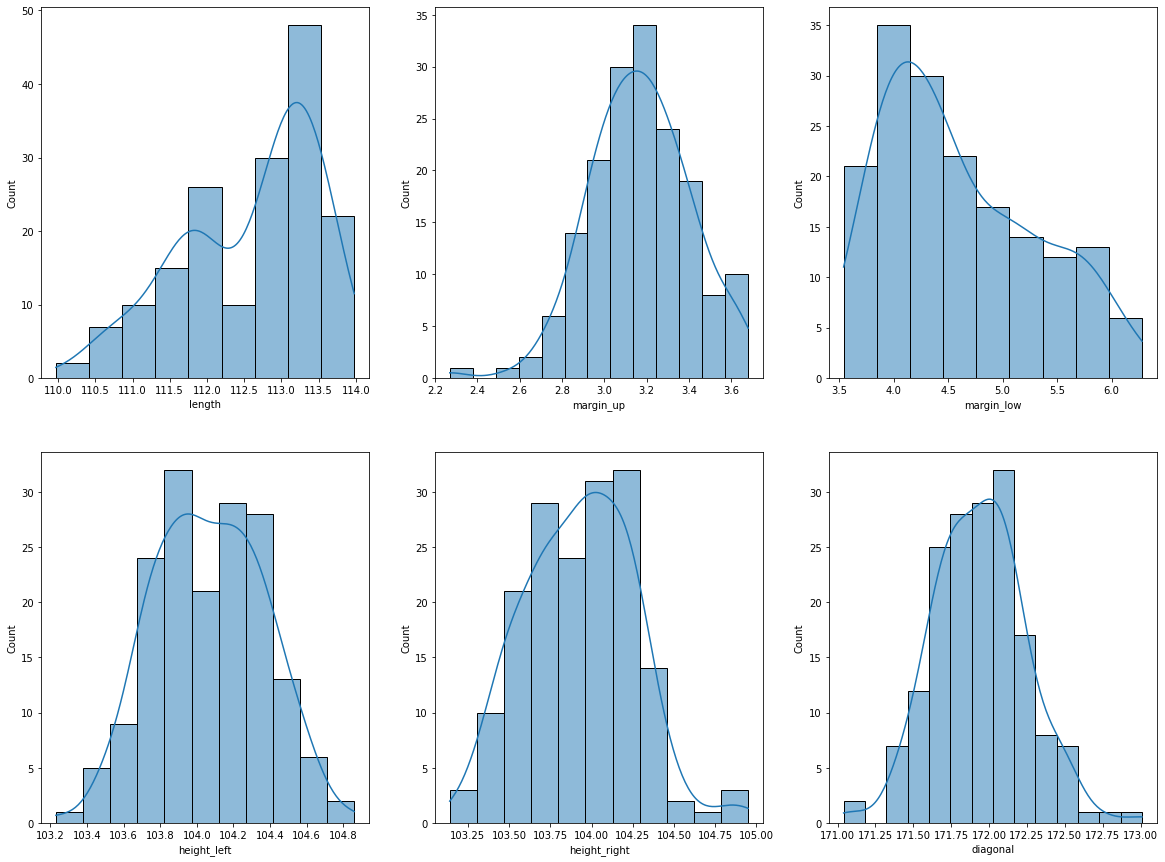

In [4]:
def plot_multiple_histograms(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,15))
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.histplot(df[col], kde=True, ax=axs)
            else:
                sns.histplot(df[col], kde=True, ax=axs[j])
        else:
            sns.histplot(df[col], kde=True, ax=axs[i, j])

            
plot_multiple_histograms(df, ['length', 'margin_up', 'margin_low', 'height_left', 'height_right', 'diagonal'])

### Distribution de la colonne 'is_genuine'

count      170
unique       2
top       True
freq       100
Name: is_genuine, dtype: object

<AxesSubplot:xlabel='is_genuine', ylabel='count'>

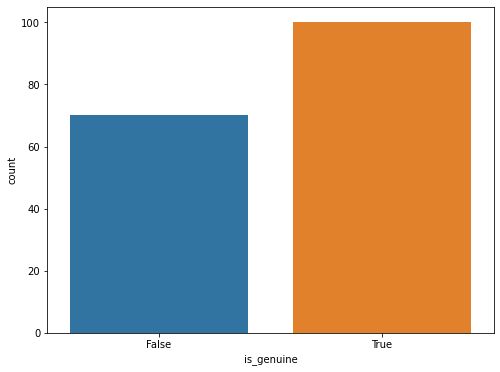

In [5]:
display(df.is_genuine.describe())

plt.figure(figsize=(8,6))
sns.countplot(x="is_genuine",
            data=df)

# Matrice des coefficients de Pearson

In [6]:
df.drop('is_genuine', axis=1).corr()

,length,margin_up,margin_low,height_left,height_right,diagonal
length,1.000000,-0.525284,-0.637352,-0.421387,-0.417021,0.080295
margin_up,-0.525284,1.000000,0.171113,0.324788,0.366918,-0.027366
margin_low,-0.637352,0.171113,1.000000,0.424530,0.509375,-0.181020
height_left,-0.421387,0.324788,0.424530,1.000000,0.734390,0.319584
height_right,-0.417021,0.366918,0.509375,0.734390,1.000000,0.220418
diagonal,0.080295,-0.027366,-0.181020,0.319584,0.220418,1.000000


Les variables les plus corrélées sont :

height_left / height_right : 0.73  
length / margin_low : -0.63  
length / margin_up : -0.53  
margin_low / height_right : 0.51  

___________________________
# Analyses bivariés

### height_left / height_right

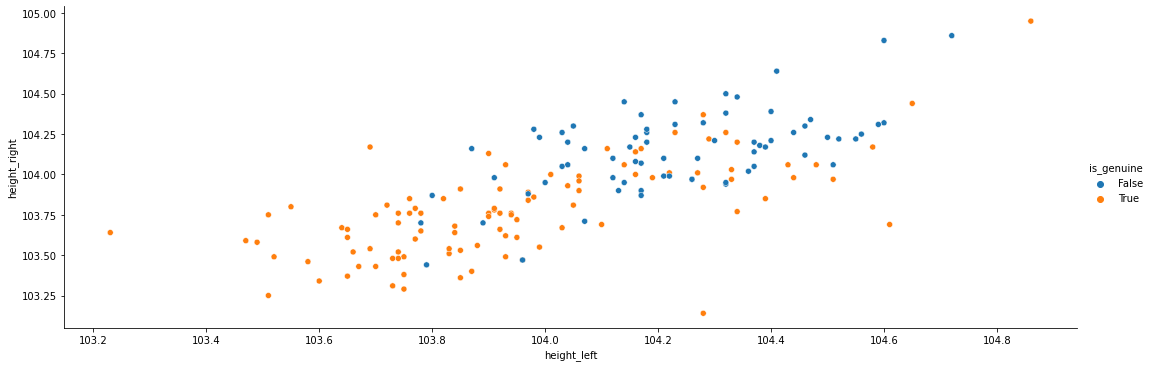

In [7]:
sns.relplot(x='height_left', y='height_right', data=df, hue='is_genuine', aspect=3.0)

### length / margin_low

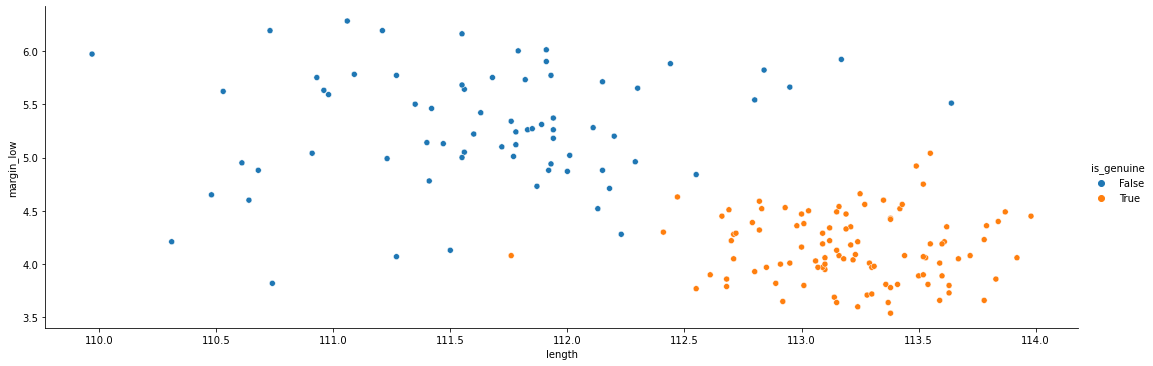

In [8]:
sns.relplot(x='length', y='margin_low', data=df, hue='is_genuine', aspect=3.0)

### length / margin_up

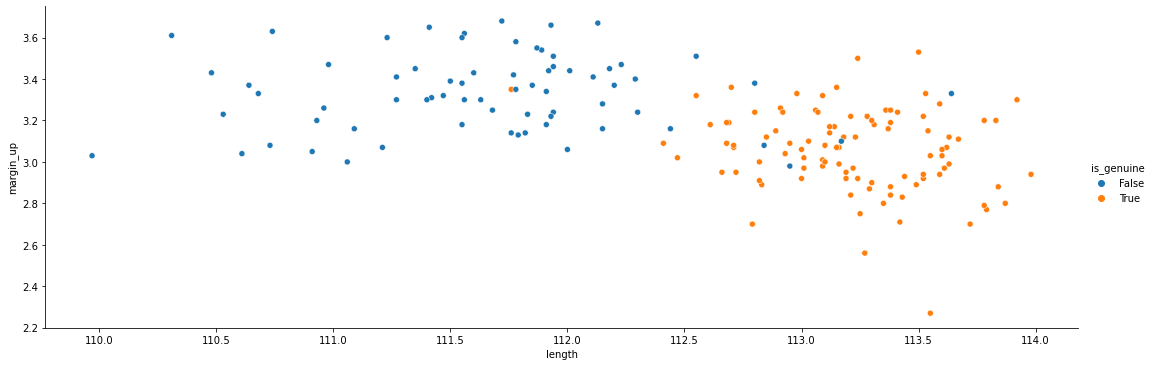

In [9]:
sns.relplot(x='length', y='margin_up', data=df, hue='is_genuine', aspect=3.0)

### margin_low / margin_up

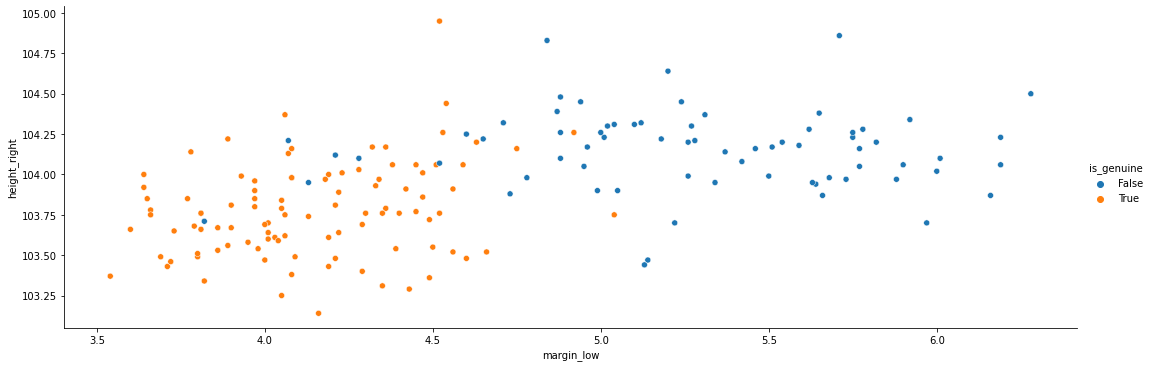

In [10]:
sns.relplot(x='margin_low', y='height_right', data=df, hue='is_genuine', aspect=3.0)

______________________
# Interprétation

Nous n'avons pas de données aberrantes. On voit que certaines variables sont corrélées. Il faudra faire attention à de potentielles colinéarités.

_____________________
# Sauvegarde du jeu de données

In [11]:
with open('Data/part1.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(df)